In [155]:
import requests
import pandas as pd
import json

In [156]:
API_KEY = 'your Youtube APi'
CHANNEL_ID = 'UCBJnS5ExQo4SIJlsqNDnXGA'

In [157]:
url1 = f'https://www.googleapis.com/youtube/v3/channels?part=statistics&key={API_KEY}&id={CHANNEL_ID}'
channel_info = requests.get(url1)
json_data1 = json.loads(channel_info.text)
json_data1

{'kind': 'youtube#channelListResponse',
 'etag': 'sNRAfS0PpPu_u1S-cznIb1giTLk',
 'pageInfo': {'totalResults': 1, 'resultsPerPage': 5},
 'items': [{'kind': 'youtube#channel',
   'etag': 'kolCQq4MYmpcx5MLAXJjgKdI5c4',
   'id': 'UCBJnS5ExQo4SIJlsqNDnXGA',
   'statistics': {'viewCount': '1338265185',
    'subscriberCount': '3840000',
    'hiddenSubscriberCount': False,
    'videoCount': '1472'}}]}

In [158]:
items_label = json_data1['items'][0]

In [159]:
chnnel_subscribers = int(items_label['statistics']['subscriberCount'])
channel_videos = int(items_label['statistics']['videoCount'])
channel_views = int(items_label['statistics']['viewCount'])

print('Total Subcribers = ',chnnel_subscribers, '\nTotal Vidieos = ', channel_videos, '\nTotal views', channel_views)

Total Subcribers =  3840000 
Total Vidieos =  1472 
Total views 1338265185


In [160]:
limit = 10
nextPageToken = ""
for i in range(limit):
    url = f'https://www.googleapis.com/youtube/v3/search?key={API_KEY}&part=snippet&channelId={CHANNEL_ID}&maxResults=20&pageToken={nextPageToken}'
    data = json.loads(requests.get(url).text)
data

{'kind': 'youtube#searchListResponse',
 'etag': 'mKLHoBHirwcA830KXXEHrf0ZvfU',
 'nextPageToken': 'CBQQAA',
 'regionCode': 'VN',
 'pageInfo': {'totalResults': 259568, 'resultsPerPage': 20},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'W0L-MVZ_IUsPAM0q5AKr5GDyrxk',
   'id': {'kind': 'youtube#video', 'videoId': 'gs7uXK5ukX8'},
   'snippet': {'publishedAt': '2022-04-09T12:00:50Z',
    'channelId': 'UCBJnS5ExQo4SIJlsqNDnXGA',
    'title': 'ngày 9 tháng 4, 2022',
    'description': 'Mua Áo Của Team Châu Phi : https://shopee.vn/quanglinhstore ▻ Mua Nước Hoa Tại: https://www.facebook.com/quanglinhstore ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/gs7uXK5ukX8/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/gs7uXK5ukX8/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/gs7uXK5ukX8/hqdefault.jpg',
      'width': 480,
      'height': 360}},
    'channelTitle':

In [161]:
video_Ids = []
for item in data['items']:
    if 'videoId' in item['id'].keys():
        video_Id = str(item['id']['videoId'])
        video_Ids.append(video_Id)
nextPageToken = data['nextPageToken']
video_Ids

['gs7uXK5ukX8',
 'zbJBHexufjg',
 'rbYAG-e1w7g',
 'vw4luUkmEG0',
 'V5NfUYofC90',
 'zDHDgX4RNAM',
 'QAMNppWA8fs',
 'HOja-8CRJps',
 '-W1lNGsDFfE',
 'YoJ33Nc-1vI',
 'q1y7tkG4Wi4',
 'UQZAe6INVZw',
 'LuuzLpK_pQ4',
 'JKY5zF8BRDA',
 'nUR_UxOE9XQ',
 'wNfVIhSsjnU',
 'v0hREjnfRtE',
 'va0KXxm7H7o',
 '3Zg6TyYtec4']

In [ ]:
data_df = pd.DataFrame(columns=['video_id','published_date',
                             'video_title','video_description',
                             'likes','views','comment_count'])
data_df.head()

In [163]:
data

{'kind': 'youtube#searchListResponse',
 'etag': 'mKLHoBHirwcA830KXXEHrf0ZvfU',
 'nextPageToken': 'CBQQAA',
 'regionCode': 'VN',
 'pageInfo': {'totalResults': 259568, 'resultsPerPage': 20},
 'items': [{'kind': 'youtube#searchResult',
   'etag': 'W0L-MVZ_IUsPAM0q5AKr5GDyrxk',
   'id': {'kind': 'youtube#video', 'videoId': 'gs7uXK5ukX8'},
   'snippet': {'publishedAt': '2022-04-09T12:00:50Z',
    'channelId': 'UCBJnS5ExQo4SIJlsqNDnXGA',
    'title': 'ngày 9 tháng 4, 2022',
    'description': 'Mua Áo Của Team Châu Phi : https://shopee.vn/quanglinhstore ▻ Mua Nước Hoa Tại: https://www.facebook.com/quanglinhstore ...',
    'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/gs7uXK5ukX8/default.jpg',
      'width': 120,
      'height': 90},
     'medium': {'url': 'https://i.ytimg.com/vi/gs7uXK5ukX8/mqdefault.jpg',
      'width': 320,
      'height': 180},
     'high': {'url': 'https://i.ytimg.com/vi/gs7uXK5ukX8/hqdefault.jpg',
      'width': 480,
      'height': 360}},
    'channelTitle':

In [164]:
for idx, VIDEO_ID in enumerate(video_Ids):
    print(f"{idx} VideoID: {VIDEO_ID} is processing.....")
    url_videoId = f"https://www.googleapis.com/youtube/v3/videos?part=statistics,snippet&key={API_KEY}&id={VIDEO_ID}"
    data = json.loads(requests.get(url_videoId).text)
    items_lable = data['items'][0]
    
    published_date = data['items'][0]['snippet']['publishedAt']
    video_title = data['items'][0]['snippet']['title']
    video_description = data['items'][0]['snippet']['description']
    likes = data['items'][0]['statistics']['likeCount']
    views = data['items'][0]['statistics']['viewCount']
    comment_count = data['items'][0]['statistics']['commentCount']

    row = [VIDEO_ID,published_date,
           video_title,video_description,
           likes,views,comment_count]
    data_df.loc[idx] = row
    
    

0 VideoID: gs7uXK5ukX8 is processing.....
1 VideoID: zbJBHexufjg is processing.....
2 VideoID: rbYAG-e1w7g is processing.....
3 VideoID: vw4luUkmEG0 is processing.....
4 VideoID: V5NfUYofC90 is processing.....
5 VideoID: zDHDgX4RNAM is processing.....
6 VideoID: QAMNppWA8fs is processing.....
7 VideoID: HOja-8CRJps is processing.....
8 VideoID: -W1lNGsDFfE is processing.....
9 VideoID: YoJ33Nc-1vI is processing.....
10 VideoID: q1y7tkG4Wi4 is processing.....
11 VideoID: UQZAe6INVZw is processing.....
12 VideoID: LuuzLpK_pQ4 is processing.....
13 VideoID: JKY5zF8BRDA is processing.....
14 VideoID: nUR_UxOE9XQ is processing.....
15 VideoID: wNfVIhSsjnU is processing.....
16 VideoID: v0hREjnfRtE is processing.....
17 VideoID: va0KXxm7H7o is processing.....
18 VideoID: 3Zg6TyYtec4 is processing.....


In [166]:
data_df['likes'] = data_df['likes'].astype('int64')
data_df['views'] = data_df['views'].astype('int64')
data_df['comment_count'] = data_df['comment_count'].astype('int64')

In [167]:
for i, value in enumerate(data_df['published_date']):
    data_df['published_date'][i] = value[0:10]


C:\Users\nguye\AppData\Local\Temp\ipykernel_11356\2488089732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['published_date'][i] = value[0:10]
C:\Users\nguye\AppData\Local\Temp\ipykernel_11356\2488089732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['published_date'][i] = value[0:10]
C:\Users\nguye\AppData\Local\Temp\ipykernel_11356\2488089732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['publi

In [236]:
data_df['published_date']

1    2020-04-13
0    2022-04-09
8    2022-06-14
10   2022-09-09
3    2022-09-15
17   2022-09-16
15   2022-09-27
16   2023-02-12
2    2023-03-28
9    2023-04-02
7    2023-05-15
6    2023-06-18
5    2024-03-09
4    2024-03-14
12   2024-03-20
11   2024-03-24
18   2024-03-31
13   2024-04-05
14   2024-04-09
Name: published_date, dtype: datetime64[ns]

In [169]:
data_df = data_df.sort_values(by='published_date')

In [232]:
data_df['published_date'] = pd.to_datetime(data_df['published_date'] )

In [171]:
for i, value in enumerate(data_df['video_title']):
    data_df['video_title'][i] = value.replace('||', '').replace('|', '').replace('Quanglinhvlogs', '').strip(' ')

C:\Users\nguye\AppData\Local\Temp\ipykernel_11356\3373489232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['video_title'][i] = value.replace('||', '').replace('|', '').replace('Quanglinhvlogs', '').strip(' ')
C:\Users\nguye\AppData\Local\Temp\ipykernel_11356\3373489232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df['video_title'][i] = value.replace('||', '').replace('|', '').replace('Quanglinhvlogs', '').strip(' ')
C:\Users\nguye\AppData\Local\Temp\ipykernel_11356\3373489232.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in th

In [172]:
import numpy as np
import matplotlib.pyplot as plt

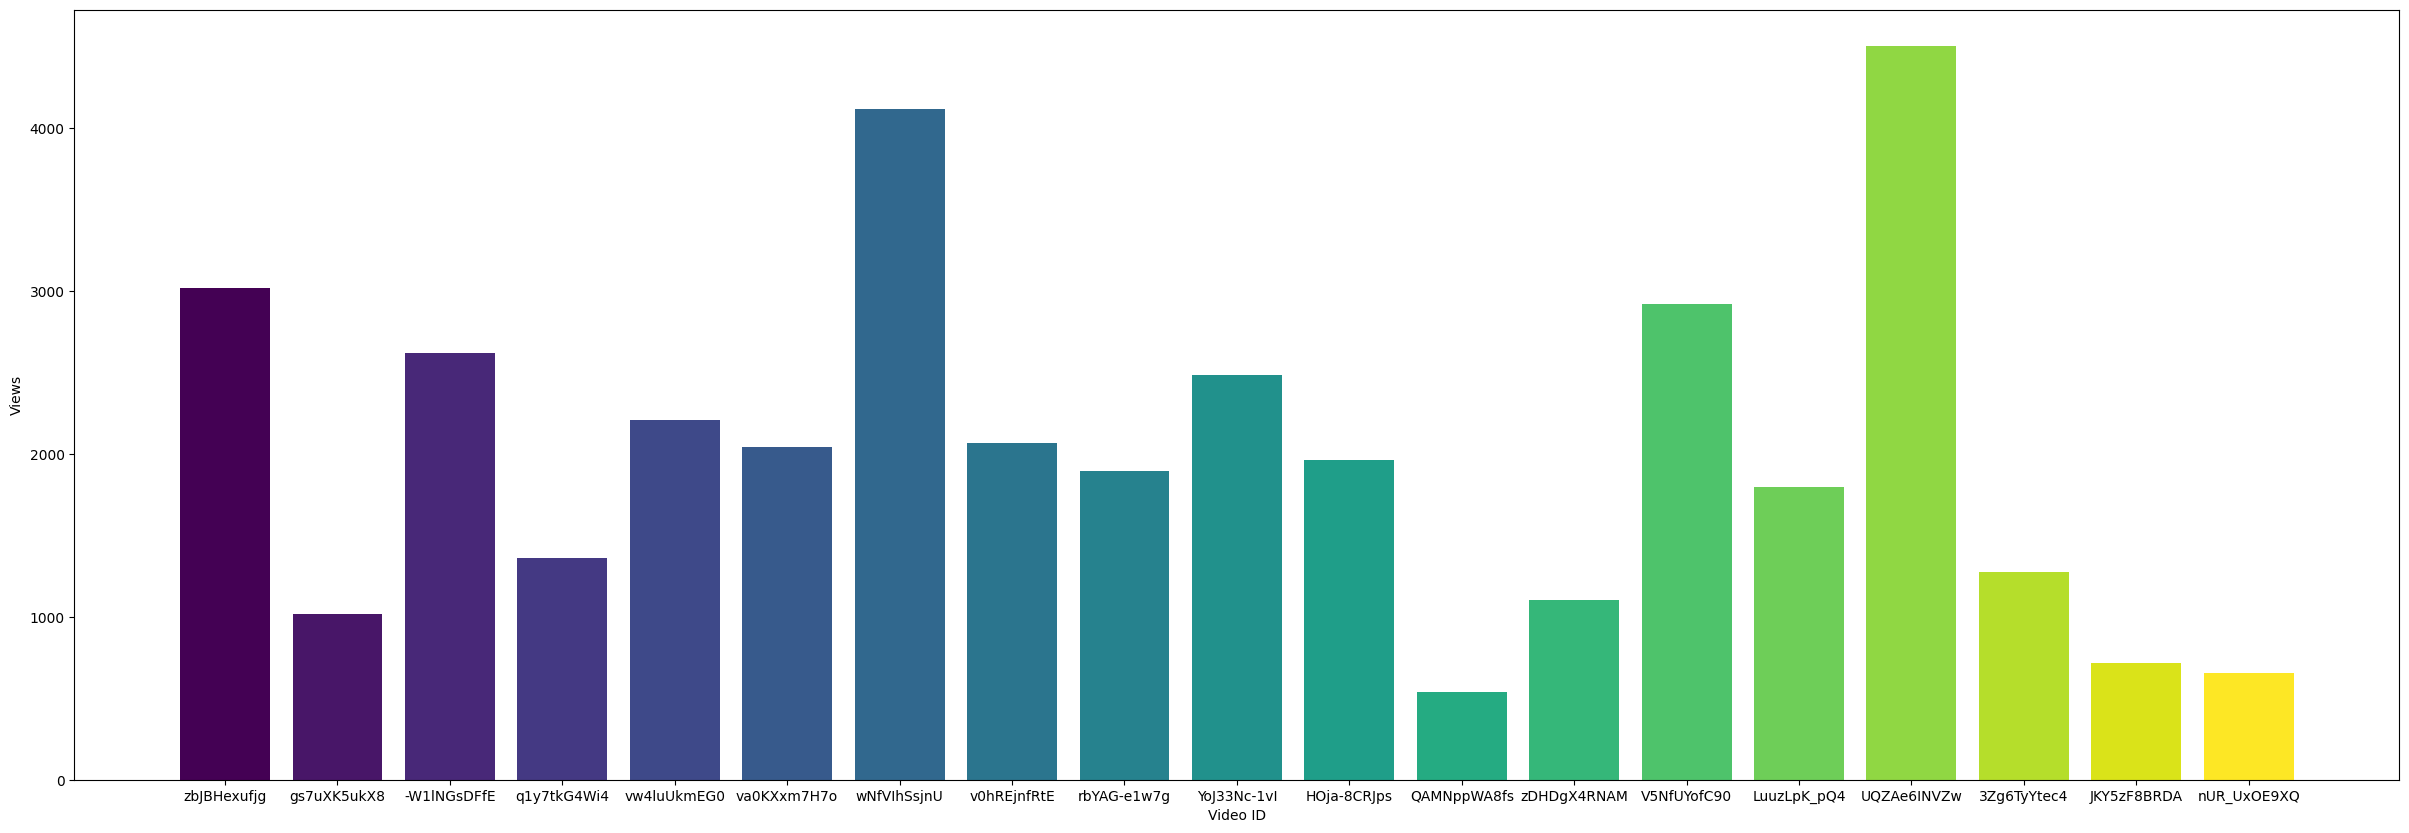

In [173]:
num_colors = len(data_df['comment_count'])
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))

plt.figure(figsize=(30, 10))

plt.bar(data_df['video_id'] ,data_df['comment_count'], color=colors)

plt.xlabel('Video ID')
plt.ylabel('Views')

plt.show()

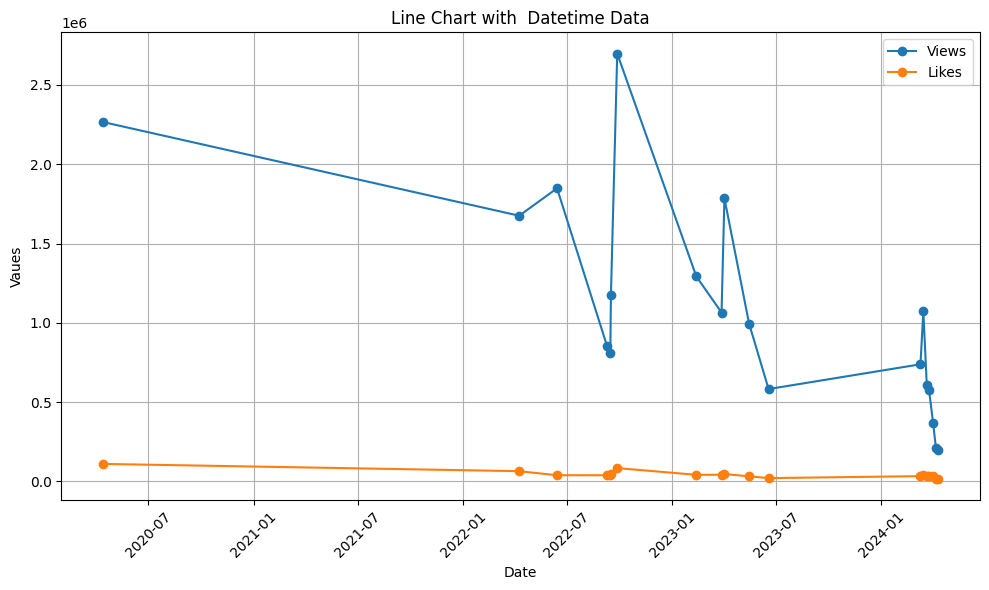

In [237]:
plt.figure(figsize=(10, 6))

#Views Line
plt.plot(data_df['published_date'], data_df['views'], marker='o', linestyle='-', label='Views')
#Likes line
plt.plot(data_df['published_date'], data_df['likes'], marker='o', linestyle='-', label='Likes')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Vaues')
plt.title('Line Chart with  Datetime Data')
# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.legend() 
plt.grid(True)
plt.tight_layout()
plt.show()

In [295]:
view_by_month = data_df.groupby(data_df['published_date'].dt.month).agg(sum_views=('views', 'sum'))
view_by_month.reset_index(inplace=True)

In [301]:
like_by_month = data_df.groupby(data_df['published_date'].dt.month).agg(like_views=('likes', 'sum'))
like_by_month.reset_index(inplace=True)

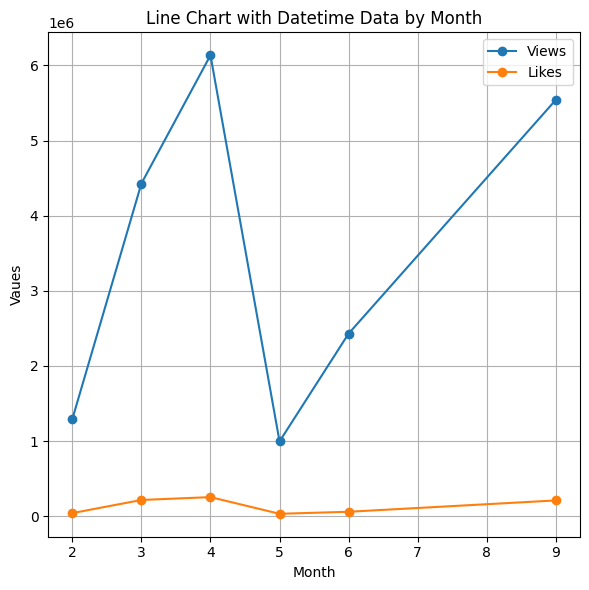

In [307]:
plt.figure(figsize=(6, 6))

#Views Line
plt.plot(view_by_month['published_date'], view_by_month['sum_views'], marker='o', linestyle='-', label='Views')
#Likes line
plt.plot(like_by_month['published_date'], like_by_month['like_views'], marker='o', linestyle='-', label='Likes')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Vaues')
plt.title('Line Chart with Datetime Data by Month')

# Display the plot
plt.legend() 
plt.grid(True)
plt.tight_layout()
plt.show()

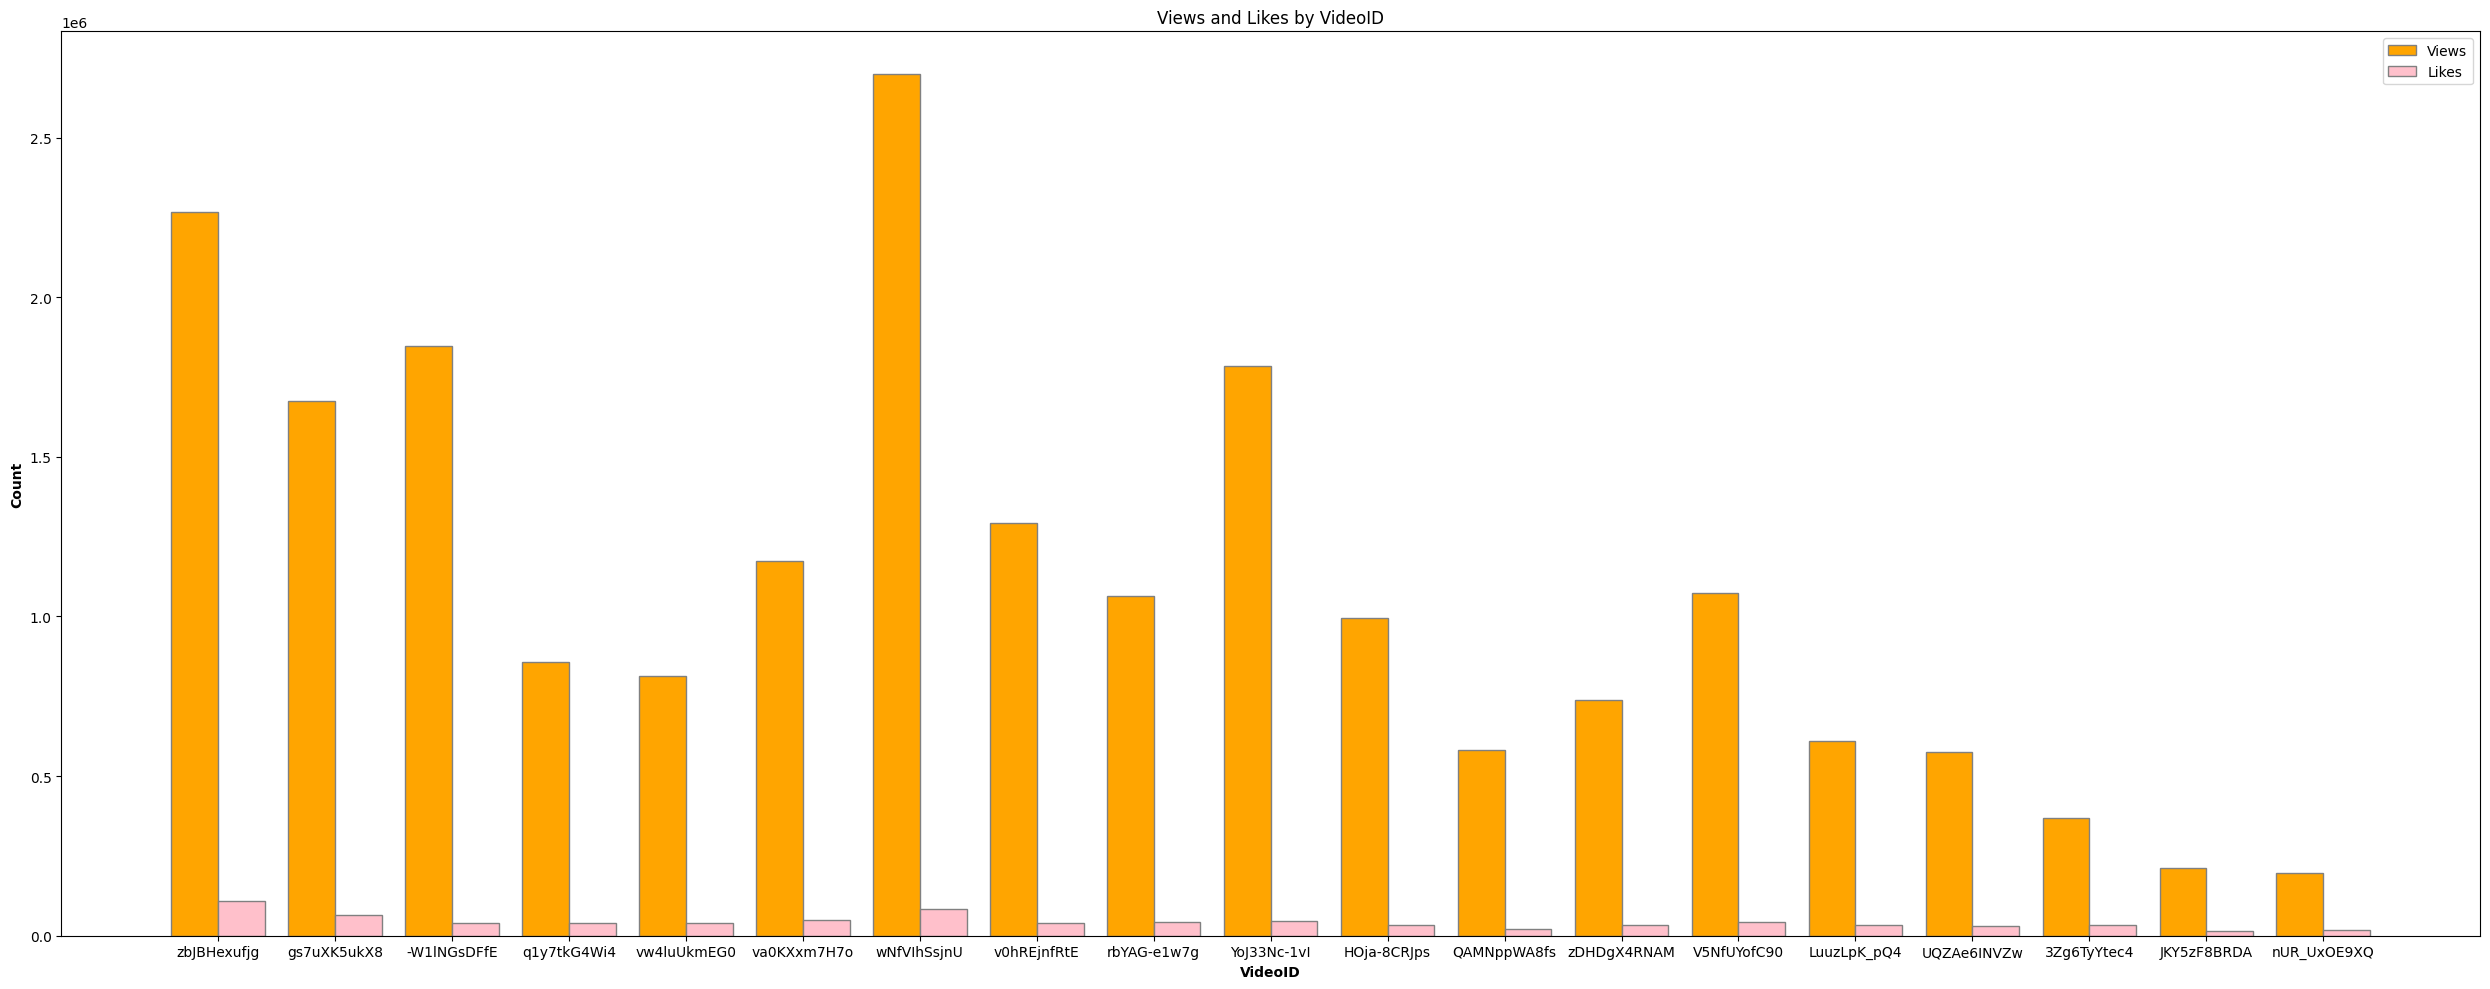

In [228]:
plt.figure(figsize=(25, 10))

bar_width = 0.4

r1 = range(len(data_df['views']))
r2 = [x + bar_width for x in r1]

plt.bar(r1, data_df['views'], color='orange', width=bar_width, edgecolor='grey', label='Views')

plt.bar(r2, data_df['likes'], color='pink', width=bar_width, edgecolor='grey', label='Likes')

plt.xlabel('VideoID', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(data_df))], data_df['video_id'])
plt.title('Views and Likes by VideoID')
plt.legend()

plt.tight_layout()
plt.show()

In [142]:
data_df.to_csv("youtubeVideo.csv", index=False, mode='w')
print("Saved to output.csv")

Saved to output.csv
